<a href="https://colab.research.google.com/github/ShaonBhattaShuvo/Deep-Learning-Workshop/blob/master/Basic_Deep_Learning_Model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
@author: Shaon Bhatta Shuvo
"""

Importing Libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skd
from sklearn import preprocessing 
import tensorflow.keras as tfk
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from mlxtend.plotting import plot_decision_regions

#Generating synthetic non-linear data to solve classification problem


In [43]:
X,y = skd.make_circles(n_samples=100, shuffle=False, noise=None, random_state=None, factor=0.9)
#print(f"X={X} \n y={y}")

#Finding and counting unique elements. 


In [44]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[ 0  1]
 [50 50]]


#Visualizing the synthetic dataset of Class 1 and Class 0: 


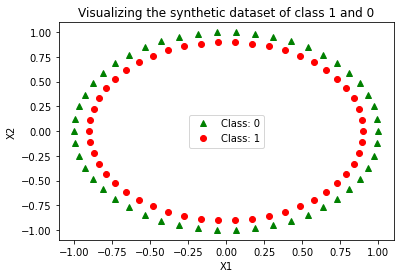

In [45]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^', label='Class: 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro' , label="Class: 1")
plt.title("Visualizing the synthetic dataset of class 1 and 0")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()  

#Splitting the dataset into train and test sets. 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Frequency of unique class of elements in the test set:

In [47]:
unique_elements_test, count_elements_test=np.unique(y_test, return_counts=True)
print(unique_elements_test, count_elements_test)

[0 1] [10 10]


#Creating validation set  by copying last 10 elements from the training set



In [48]:
X_val = X_train[70:]
y_val = y_train[70:]

#Removing the validation set (last 10 elements) from training set


In [49]:
X_train = X_train[:70]
y_train = y_train[:70]

#Building a simple deep neural model


2 input -> [50 units in layer1] ->[100 units in layer2] ->[100 units in layer3] -> 1 output

In [79]:
model = tfk.Sequential()
model.add(tfk.layers.Dense(50,input_shape=(2,), activation='relu')) #First Hidden Layer
model.add(tfk.layers.Dense(100, activation='relu')) #Second Hidden Layer
model.add(tfk.layers.Dense(100, activation='relu')) #Third Hidden Layer
model.add(tfk.layers.Dense(1, activation='sigmoid')) #Output Layer

# Compiling the model for binary classification 
[Use loss = categorical_crossentropy for multiclass prediction.] 

In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 


#Model Overview

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 500)               1500      
                                                                 
 dense_21 (Dense)            (None, 1000)              501000    
                                                                 
 dense_22 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_23 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_24 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_25 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 3,506,501
Trainable params: 3,506,501
No

#Train the model

In [72]:
training = model.fit(X_train,y_train, epochs = 50, batch_size =10, validation_data =(X_val,y_val))


Epoch 1/50
7/7 [==============================] - 1s 69ms/step - loss: 0.7125 - accuracy: 0.4429 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 0s 49ms/step - loss: 0.7046 - accuracy: 0.5000 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 0s 47ms/step - loss: 0.6930 - accuracy: 0.4429 - val_loss: 0.6901 - val_accuracy: 0.4000
Epoch 4/50
7/7 [==============================] - 0s 47ms/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 0s 40ms/step - loss: 0.6887 - accuracy: 0.5000 - val_loss: 0.6851 - val_accuracy: 0.6000
Epoch 6/50
7/7 [==============================] - 0s 39ms/step - loss: 0.6878 - accuracy: 0.5429 - val_loss: 0.6844 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 0s 36ms/step - loss: 0.6891 - accuracy: 0.5714 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 8/50
7/7 [===========

#Visulaizing the Training and Validation Sets Loss and Accuracy


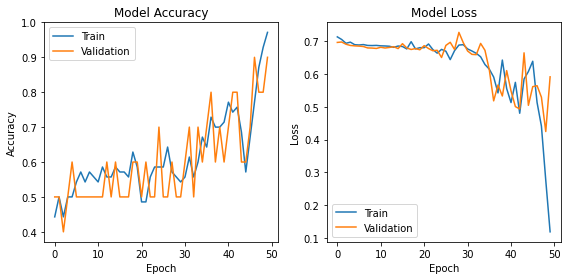

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#Plot training and validation accuracy values
#axes[0].set_ylim(0,1) #if we want to limit axis in certain range
axes[0].plot(training.history['accuracy'], label='Train')
axes[0].plot(training.history['val_accuracy'], label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
#Plot training and validation loss values
#axes[1].set_ylim(0,1)
axes[1].plot(training.history['loss'], label='Train')
axes[1].plot(training.history['val_loss'], label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.tight_layout()
plt.show()

# Evaluating the performance on the Test set 

In [67]:
test_loss_accuracy = model.evaluate(X_test, y_test, verbose=2)


1/1 - 0s - loss: 0.6689 - accuracy: 0.6500 - 139ms/epoch - 139ms/step


# Visualising the Training and Test set plot decision area


  11/5184 [..............................] - ETA: 1:00

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


5184/5184 [==============================] - 55s 11ms/step


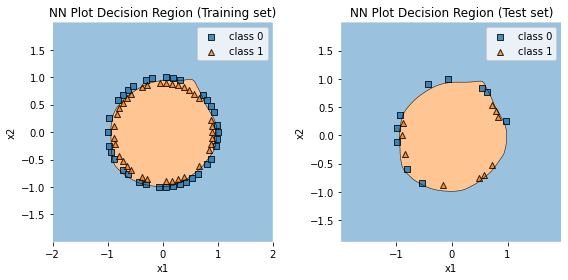

In [74]:
fig, axes = plt.subplots (nrows=1, ncols=2, figsize=(8, 4))
fig1 = plot_decision_regions(X_train, y_train, clf=model, ax=axes[0], legend=0)
fig2 = plot_decision_regions(X_test, y_test, clf=model, ax=axes[1], legend=0)
axes[0].set_title('NN Plot Decision Region (Training set)')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[1].set_title('NN Plot Decision Region (Test set)')
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')

handles, labels = fig1.get_legend_handles_labels()
fig1.legend(handles, 
          ['class 0', 'class 1'])
fig2.legend(handles, 
          ['class 0', 'class 1'])

plt.tight_layout()
plt.show()

# Using non-linear SVM calssifier , use kernel=linear for linear classifier. 



In [75]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf') #rbf = 'radial basis function' for non-linear classification
classifier.fit(X_train,y_train)

SVC()

# Predicting Teset set result for SVM


In [76]:
y_pred = classifier.predict(X_test)

# Generating confusion matrics, details classification report


In [77]:
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix for SVM Clssifer:\n ",cm)
print( "{0}".format(metrics.classification_report(y_test,y_pred)))

Confusion Matrix for SVM Clssifer:
  [[2 8]
 [5 5]]
              precision    recall  f1-score   support

           0       0.29      0.20      0.24        10
           1       0.38      0.50      0.43        10

    accuracy                           0.35        20
   macro avg       0.34      0.35      0.34        20
weighted avg       0.34      0.35      0.34        20



#Visualising the Training and Test set plot decision area for SVM classifier


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


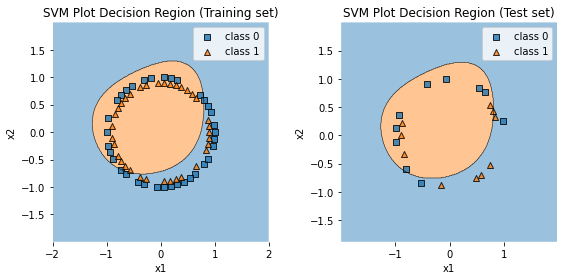

In [78]:
fig, axes = plt.subplots (nrows=1, ncols=2, figsize=(8, 4))
fig1 = plot_decision_regions(X_train, y_train, clf=classifier, ax=axes[0], legend=0)
fig2 = plot_decision_regions(X_test, y_test, clf=classifier, ax=axes[1], legend=0)
axes[0].set_title('SVM Plot Decision Region (Training set)')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[1].set_title('SVM Plot Decision Region (Test set)')
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
handles, labels = fig1.get_legend_handles_labels()
fig1.legend(handles, 
          ['class 0', 'class 1'])
fig2.legend(handles, 
          ['class 0', 'class 1'])

plt.tight_layout()
plt.show()